In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Tools import Plot
%matplotlib widget

np.random.seed(4)

In [8]:
N = 100000
x = np.random.rand(N)

## Creating cosine training data

In [ ]:
y = np.cos(2*np.pi*x) - 1

file = open('Data/cos.txt', 'w+') 

for i in range(N-1):
    file.write(f'{x[i]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1]:.14} {y[N-1]:.14}')
file.close()

## Creating sine training data

In [ ]:
y = np.sin(2*np.pi*x)

file = open('Data/sin.txt', 'w+') 

for i in range(N-1):
    file.write(f'{x[i]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1]:.14} {y[N-1]:.14}')
file.close()

## Creating tanh function training data

In [9]:
k = 50   # steepness parameter
x1 = 1/3  # location of transition parameter
x2 = 2/3

y = 1/2*(1 + np.tanh(k*(x-x1))) - 1/2*(1 + np.tanh(k*(x-x2)))

file = open('Data/tanh_k50.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1]:.14} {y[N-1]:.14}')
file.close()

## Creating sharp circle function in 2D

In [4]:
x = np.random.rand(N,2)
center = [1/2, 1/2] # center of the circle
r = 1/5           # radius of the circle
k = 100            # steepness

y = 1/2*(1 + np.tanh(-k*(np.sqrt((x[:,0]-center[0])**2 + (x[:,1]-center[1])**2) - r)))
    
file = open('Data/tanh_2D.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i,0]:.14} {x[i,1]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1,0]:.14} {x[N-1,1]:.14} {y[N-1]:.14}')
file.close()

## Looking at the 2D function

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


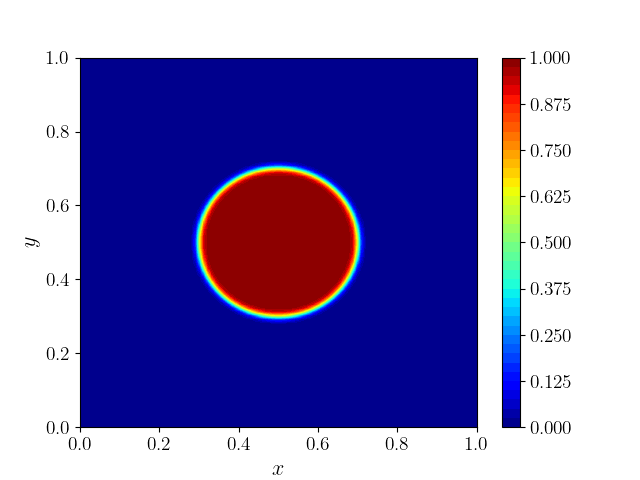

In [5]:
x = np.linspace(0,1,100)
X,Y = np.meshgrid(x,x)
center = [1/2, 1/2] # center of the circle
r = 1/5           # radius of the circle
k = 100            # steepness
Z = 1/2*(1 + np.tanh(-k*(np.sqrt((X-center[0])**2 + (Y-center[1])**2) - r)))
print(Z)

plt.figure()
plt.contourf(X, Y, Z, levels=40, cmap='jet')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

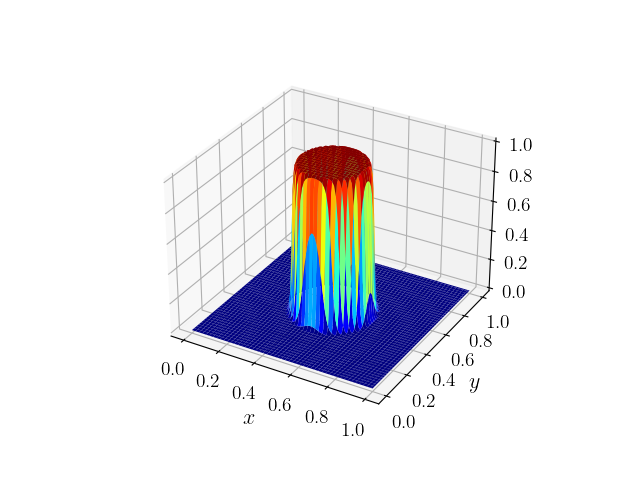

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='jet')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Creating the function from equation 49 in the paper

In [ ]:
dim = 2

x = np.random.rand(N,dim)
y = np.zeros(N)
E = 4

norm = lambda x: np.linalg.norm(x, 2, axis=1)
a = lambda x: np.tanh(E*np.sin(5*np.pi/2*x))
b = lambda x: np.tanh(E*np.sin(5*np.pi/2*x))

y = a(a(norm(x))) + a(b(norm(x-1)))

file = open('Data/function_paper.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i,0]:.14} {x[i,1]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1,0]:.14} {x[N-1,1]:.14} {y[N-1]:.14}')
file.close()

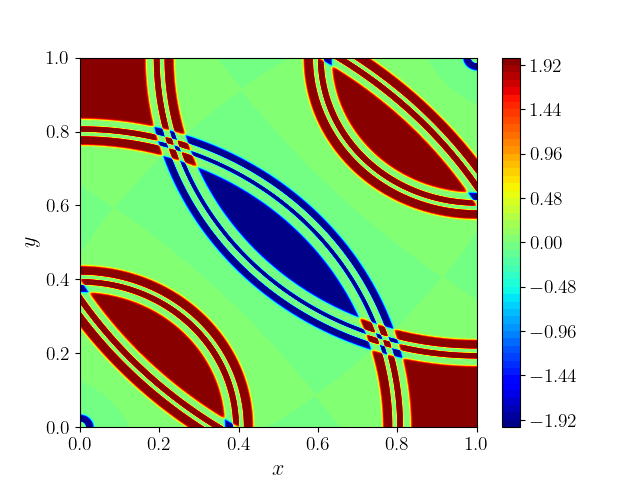

In [32]:
x = np.linspace(0,1,1000)
X,Y = np.meshgrid(x,x)
E = 4

norm = lambda X,Y: np.sqrt(X**2 + Y**2)
a = lambda X: np.tanh(E*np.sin(5*np.pi/2*X))
b = lambda X: np.tanh(E*np.sin(5*np.pi/2*X))

Z = a(a(norm(X,Y))) + a(b(norm(X-1, Y-1)))

plt.figure()
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [29]:
norm(X,Y).shape

(100, 100)